In [3]:
import sys  
sys.path.insert(0, '/Users/franci/MasterThesis/multiomics-perturbation/new_model')

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Training scenario 3

In [4]:
from src_trainer.plotting import boxplot_grouped_corr, average_corr_mean_condition
import seaborn as sns

ct_list = ['B', 'CD4T', 'CD8T', 'DC', 'Monocyte']

sample_dist_list = ["posterior", "prior", "transfer"]
col_conds = [{'PG': None, 'ADJ': 'medium', 'CT': None},
             {'PG': None, 'ADJ': 'PI', 'CT': None}]

folder_name = 'csv_3_RNA'

def average_corr_mean(folder, model_type, model_name, sample_dist_list, score = "corr_mean", modality="RNA"):
    """
    Calculates average correlation mean per sample distribution 
    :param filename: 
    :return: 
    """
    for sample_dist in sample_dist_list:
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format(folder, model_type, model_name, sample_dist, modality))
        avg = np.mean(df[score])
        print("Average for {}: {}".format(sample_dist, np.round(avg,2)))
        

def all_boxplot_posterior_PS(cat_cov_model_dict, modality, label_models, score, title):
    data_list = []
    for cat_cov, model_dict in cat_cov_model_dict.items():
        print(model_dict)
        for i, (model_type, model_name) in enumerate(model_dict.items()):
            df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format('csv_3_RNA', model_type, model_name, 'posterior', modality))
            idx_list = []
            df["CAT_COV"] = cat_cov
            df["model_type"] = label_models[i]
            data_list.append(df[["CAT_COV", score, "model_type"]])
            
    dataframe = pd.concat(data_list)

    fig = plt.figure()
    sns.boxplot(y=score, x='CAT_COV',
                data=dataframe,
                palette="colorblind",
                hue='model_type')
    plt.title(title)
    plt.show()
    

def boxplot_posterior_PS(model_type_dict, modality, label_models, score, title):
    labels = []
    data_list = []
    for i, (model_type, model_name) in enumerate(model_type_dict.items()):
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format('csv_3_RNA', model_type, model_name, 'posterior', modality))
        idx_list = []
        labels.append(label_models[i])
        data_list.append(df[score])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(data_list, labels=labels)
    plt.title(title)
    plt.show()

Global seed set to 0


## Categorical covariates: ADJ, CT

In [32]:
model_type_dict = {
                   "SCVI_RNA": "20220613-112742",
                   "TOTALVI": "20220613-114743", 
                   "MMVAE": "20220613-120653",
                  }

Correlation mean


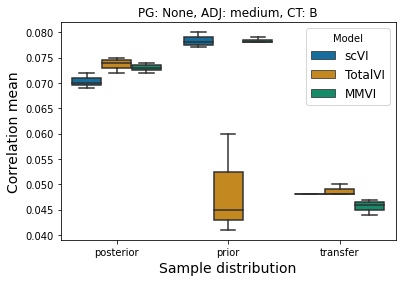

Correlation variance


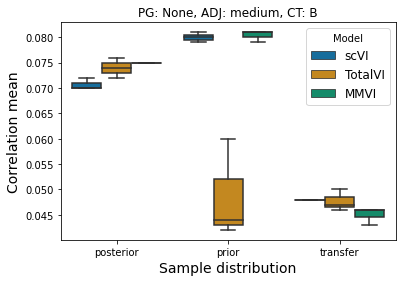

Correlation mean


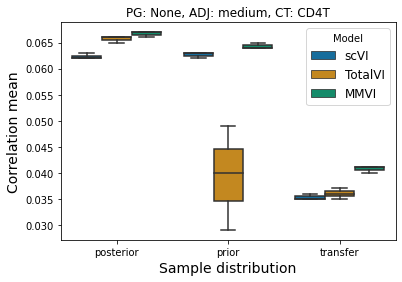

Correlation variance


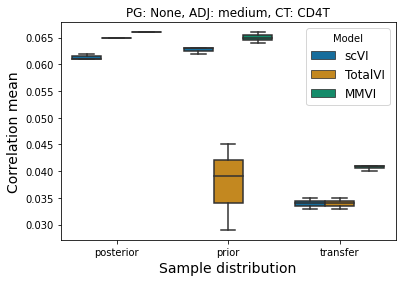

Correlation mean


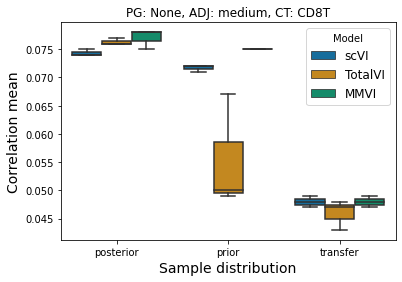

Correlation variance


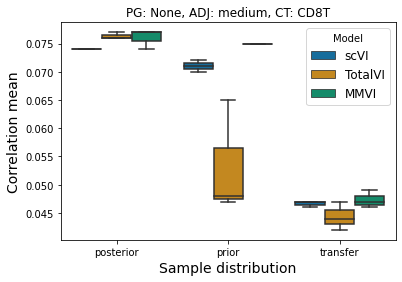

Correlation mean


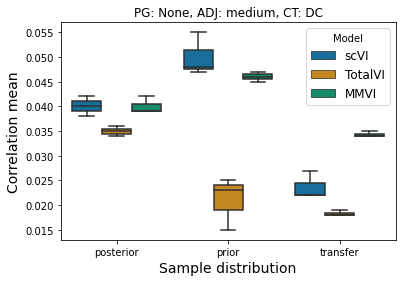

Correlation variance


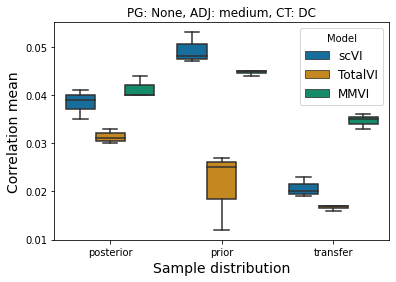

Correlation mean


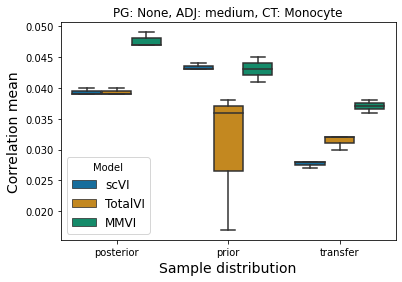

Correlation variance


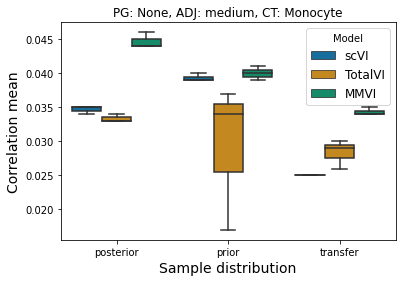

Correlation mean


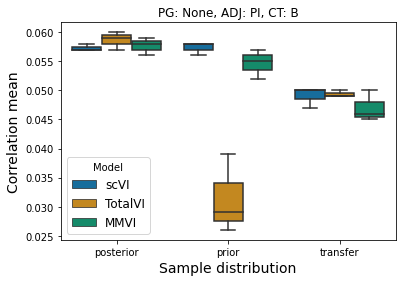

Correlation variance


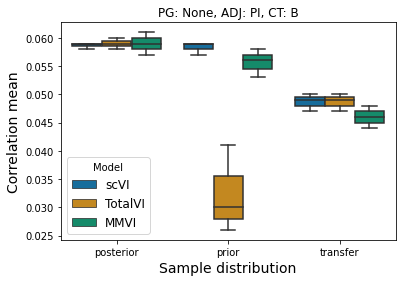

Correlation mean


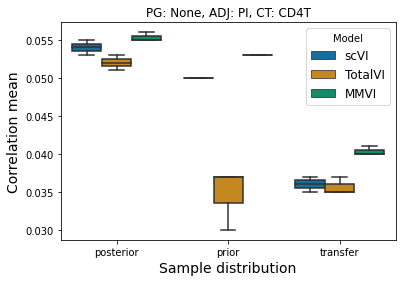

Correlation variance


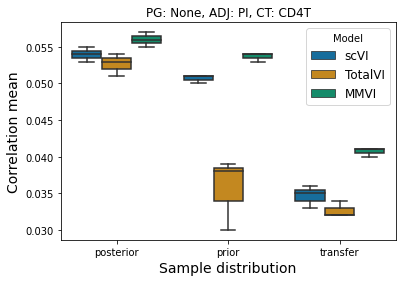

Correlation mean


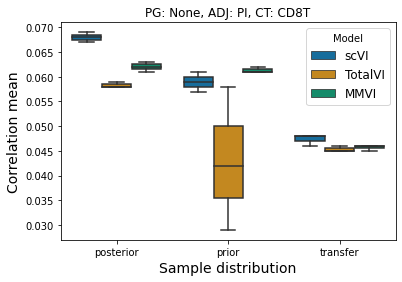

Correlation variance


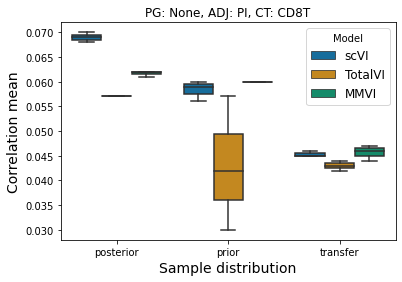

Correlation mean


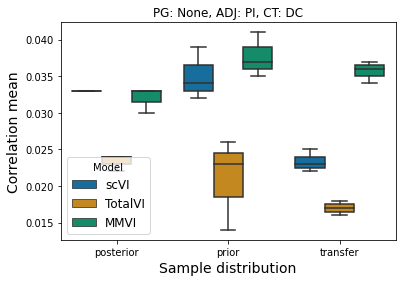

Correlation variance


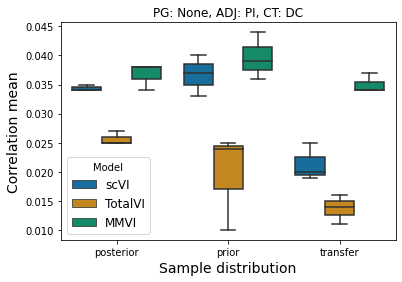

Correlation mean


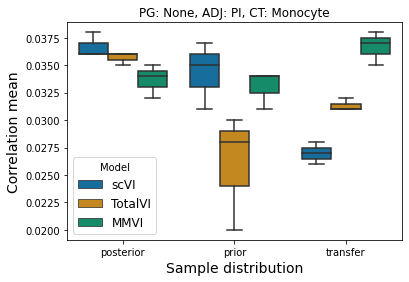

Correlation variance


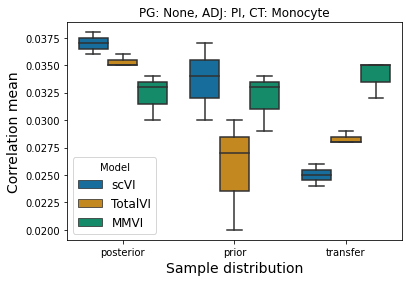

In [33]:
for d in col_conds:
    for ct in ct_list:
        d['CT'] = ct
        print("Correlation mean")
        boxplot_grouped_corr(model_type_dict,
                             sample_dist_list,
                             d,
                             score="corr_mean",
                             folder = folder_name)
        print("Correlation variance")
        boxplot_grouped_corr(model_type_dict,
                             sample_dist_list,
                             d,
                             score="corr_var",
                             folder = folder_name)
    

In [34]:
for model_type, model_name in model_type_dict.items():
    print(model_type + " corr_mean")
    average_corr_mean("csv_3_RNA", model_type, model_name, sample_dist_list, score = "corr_mean")
    print(model_type + " corr_var")
    average_corr_mean("csv_3_RNA", model_type, model_name, sample_dist_list, score = "corr_var")

SCVI_RNA corr_mean
Average for posterior: 0.06
Average for prior: 0.06
Average for transfer: 0.04
SCVI_RNA corr_var
Average for posterior: 0.05
Average for prior: 0.05
Average for transfer: 0.04
TOTALVI corr_mean
Average for posterior: 0.05
Average for prior: 0.03
Average for transfer: 0.04
TOTALVI corr_var
Average for posterior: 0.05
Average for prior: 0.03
Average for transfer: 0.04
MMVAE corr_mean
Average for posterior: 0.06
Average for prior: 0.06
Average for transfer: 0.04
MMVAE corr_var
Average for posterior: 0.06
Average for prior: 0.06
Average for transfer: 0.04


## Excluded population RT

In [50]:
model_type_dict = {
                   "SCVI_RNA": "20220614-121046",
                   "TOTALVI": "20220614-124622", 
                   "MMVAE": "20220617-134247",
                  }

Correlation mean


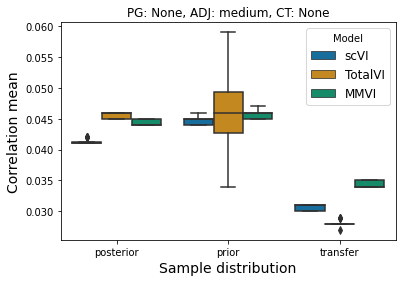

{'SCVI_RNA_posterior': 0.04125, 'SCVI_RNA_prior': 0.04491666666666667, 'SCVI_RNA_transfer': 0.030541666666666665, 'TOTALVI_posterior': 0.04570833333333333, 'TOTALVI_prior': 0.045625, 'TOTALVI_transfer': 0.028125, 'MMVAE_posterior': 0.044375, 'MMVAE_prior': 0.04570833333333333, 'MMVAE_transfer': 0.03441666666666667}
Correlation mean


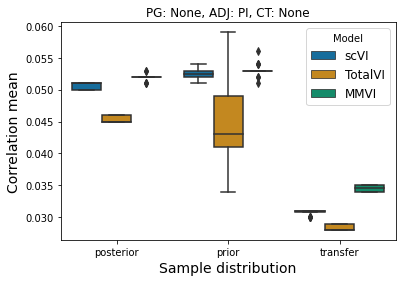

{'SCVI_RNA_posterior': 0.05054166666666667, 'SCVI_RNA_prior': 0.052541666666666674, 'SCVI_RNA_transfer': 0.03075, 'TOTALVI_posterior': 0.045375, 'TOTALVI_prior': 0.04533333333333334, 'TOTALVI_transfer': 0.028333333333333335, 'MMVAE_posterior': 0.05195833333333333, 'MMVAE_prior': 0.05308333333333334, 'MMVAE_transfer': 0.0345}


In [51]:
for d in col_conds:
    print("Correlation mean")
    dataframe, mean_list, std_dict = boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name)
    print(mean_list)
    """
    print("Correlation variance")
    dataframe, mean_list, std_dict = boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_var",
                         folder = folder_name)
    print(mean_list)
    """
    

In [37]:
for model_type, model_name in model_type_dict.items():
    print(model_type + " corr_mean")
    average_corr_mean("csv_3_RNA", model_type, model_name, sample_dist_list, score = "corr_mean")
    print(model_type + " corr_var")
    average_corr_mean("csv_3_RNA", model_type, model_name, sample_dist_list, score = "corr_var")

SCVI_RNA corr_mean
Average for posterior: 0.05
Average for prior: 0.05
Average for transfer: 0.03
SCVI_RNA corr_var
Average for posterior: 0.04
Average for prior: 0.05
Average for transfer: 0.03
TOTALVI corr_mean
Average for posterior: 0.05
Average for prior: 0.05
Average for transfer: 0.03
TOTALVI corr_var
Average for posterior: 0.04
Average for prior: 0.05
Average for transfer: 0.02
MMVAE corr_mean
Average for posterior: 0.05
Average for prior: 0.05
Average for transfer: 0.03
MMVAE corr_var
Average for posterior: 0.05
Average for prior: 0.05
Average for transfer: 0.03


## Excluded population group LD

In [52]:
model_type_dict = {
                   "SCVI_RNA": "20220618-154805",
                   "TOTALVI": "20220616-202804", 
                   "MMVAE": "20220616-204959",
                  }

Correlation mean


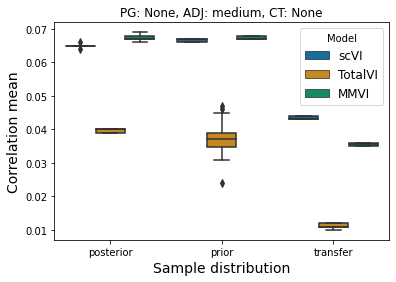

{'SCVI_RNA_posterior': 0.065, 'SCVI_RNA_prior': 0.06658333333333334, 'SCVI_RNA_transfer': 0.04345833333333334, 'TOTALVI_posterior': 0.039625, 'TOTALVI_prior': 0.03741666666666667, 'TOTALVI_transfer': 0.011291666666666667, 'MMVAE_posterior': 0.06729166666666668, 'MMVAE_prior': 0.06733333333333334, 'MMVAE_transfer': 0.035500000000000004}
Correlation mean


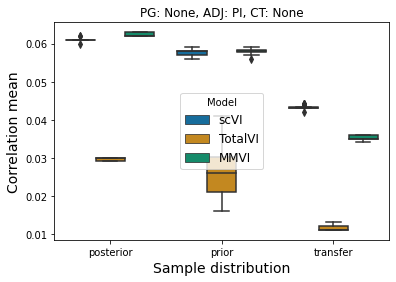

{'SCVI_RNA_posterior': 0.06104166666666666, 'SCVI_RNA_prior': 0.0575, 'SCVI_RNA_transfer': 0.04320833333333333, 'TOTALVI_posterior': 0.029541666666666664, 'TOTALVI_prior': 0.026041666666666668, 'TOTALVI_transfer': 0.011416666666666667, 'MMVAE_posterior': 0.06241666666666667, 'MMVAE_prior': 0.057958333333333334, 'MMVAE_transfer': 0.035375000000000004}


In [53]:
for d in col_conds:
    print("Correlation mean")
    dataframe, mean_list, std_dict =  boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name)
    print(mean_list)
    """
    print("Correlation variance")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_var",
                         folder = folder_name)
    """
    

In [40]:
for model_type, model_name in model_type_dict.items():
    print(model_type + " corr_mean")
    average_corr_mean("csv_3_RNA", model_type, model_name, sample_dist_list, score = "corr_mean")
    print(model_type + " corr_var")
    average_corr_mean("csv_3_RNA", model_type, model_name, sample_dist_list, score = "corr_var")

SCVI_RNA corr_mean
Average for posterior: 0.06
Average for prior: 0.06
Average for transfer: 0.04
SCVI_RNA corr_var
Average for posterior: 0.06
Average for prior: 0.06
Average for transfer: 0.04
TOTALVI corr_mean
Average for posterior: 0.03
Average for prior: 0.03
Average for transfer: 0.01
TOTALVI corr_var
Average for posterior: 0.03
Average for prior: 0.03
Average for transfer: 0.01
MMVAE corr_mean
Average for posterior: 0.06
Average for prior: 0.06
Average for transfer: 0.04
MMVAE corr_var
Average for posterior: 0.06
Average for prior: 0.06
Average for transfer: 0.03


## Excluded population group: DK

In [54]:
model_type_dict = {
                   "SCVI_RNA": "20220618-154913",
                   "TOTALVI": "20220616-202944", 
                   "MMVAE": "20220616-204854",
                  }

Correlation mean


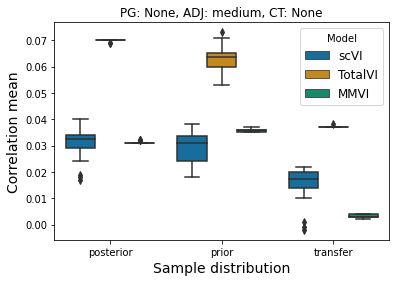

{'SCVI_RNA_posterior': 0.030791666666666665, 'SCVI_RNA_prior': 0.02929166666666667, 'SCVI_RNA_transfer': 0.015416666666666667, 'TOTALVI_posterior': 0.06991666666666667, 'TOTALVI_prior': 0.062625, 'TOTALVI_transfer': 0.03704166666666666, 'MMVAE_posterior': 0.031125, 'MMVAE_prior': 0.035750000000000004, 'MMVAE_transfer': 0.0032500000000000007}
Correlation mean


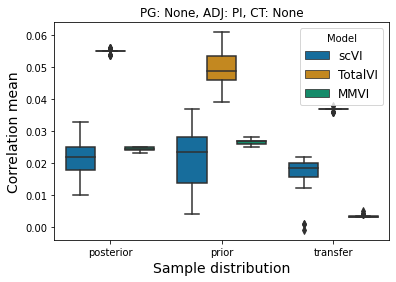

{'SCVI_RNA_posterior': 0.021666666666666667, 'SCVI_RNA_prior': 0.022375000000000003, 'SCVI_RNA_transfer': 0.016125, 'TOTALVI_posterior': 0.055, 'TOTALVI_prior': 0.050166666666666665, 'TOTALVI_transfer': 0.03683333333333333, 'MMVAE_posterior': 0.024458333333333335, 'MMVAE_prior': 0.02666666666666667, 'MMVAE_transfer': 0.0032916666666666667}


In [55]:
for d in col_conds:
    print("Correlation mean")
    dataframe, mean_list, std_dict = boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name)
    print(mean_list)
    """
    print("Correlation variance")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_var",
                         folder = folder_name)
    """

In [43]:
for model_type, model_name in model_type_dict.items():
    print(model_type + " corr_mean")
    average_corr_mean("csv_3_RNA", model_type, model_name, sample_dist_list, score = "corr_mean")
    print(model_type + " corr_var")
    average_corr_mean("csv_3_RNA", model_type, model_name, sample_dist_list, score = "corr_var")

SCVI_RNA corr_mean
Average for posterior: 0.03
Average for prior: 0.03
Average for transfer: 0.02
SCVI_RNA corr_var
Average for posterior: 0.03
Average for prior: 0.02
Average for transfer: 0.01
TOTALVI corr_mean
Average for posterior: 0.06
Average for prior: 0.06
Average for transfer: 0.04
TOTALVI corr_var
Average for posterior: 0.06
Average for prior: 0.06
Average for transfer: 0.03
MMVAE corr_mean
Average for posterior: 0.03
Average for prior: 0.03
Average for transfer: 0.0
MMVAE corr_var
Average for posterior: 0.03
Average for prior: 0.03
Average for transfer: 0.0


## Thesis figure 

Boxplot for results of prior and transfer predictive sampling for MMVI. 


In [49]:
import seaborn as sns


def boxplot_MMVI(label_dict,
                 sample_dist,
                 score = 'corr_mean',
                 folder = 'csv_3_RNA', 
                 model_type = 'MMVAE',
                 modality = 'RNA',
                 jitter = False,
                 y_lim = [-0.1,1]
                ):
    labels = []
    data_list = []
    data_list_snb = []
    for i, (pop_group, model_name) in enumerate(label_dict.items()):
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format(folder, model_type, model_name, sample_dist, modality))
        idx_list = []
        idx_list.append(set(np.where([df['PG'] == pop_group])[1]))
        labels.append(pop_group)
        bool_idx = list(set.intersection(*map(set, idx_list)))
        data_list.append(df.iloc[bool_idx, :][score])
        data_list_snb.append(df.iloc[bool_idx, :][[score, 'PG', 'ADJ']])
        
    dataframe = pd.concat(data_list_snb)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    if jitter: 
        ax = sns.swarmplot(y=score, x='PG',
                data=dataframe,
                palette="colorblind",
                hue = 'ADJ',
                size=10, marker="D", edgecolor="gray", alpha = 0.5)
        
    else:
        ax.boxplot(data_list, labels=labels)
    ax.set_ylabel("Correlation mean", fontsize=16)
    ax.set_xlabel("Excluded population group", fontsize=16)
    ax.set_ylim(y_lim)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3, fontsize=14)
    plt.style.use('seaborn-whitegrid')
    plt.show()
    


No handles with labels found to put in legend.


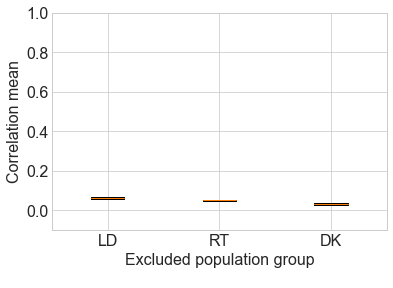

In [55]:
label_dict = {"LD": "20220616-204959",
              "RT": "20220617-134247",
              "DK": "20220616-204854"}

boxplot_MMVI(label_dict, 'prior')

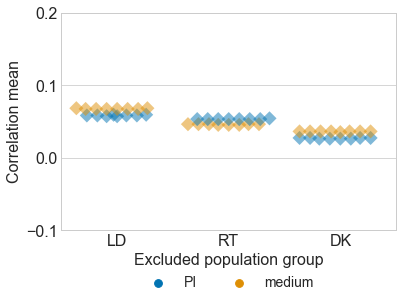

In [56]:
boxplot_MMVI(label_dict, 'prior', jitter = True, y_lim = [-0.1,0.2])

No handles with labels found to put in legend.


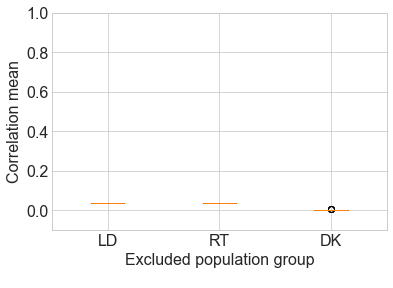

In [53]:
label_dict = {"LD": "20220616-204959",
              "RT": "20220617-134247",
              "DK": "20220616-204854"}

boxplot_MMVI(label_dict, 'transfer')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


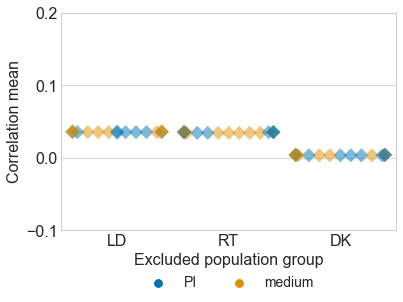

In [54]:
boxplot_MMVI(label_dict, 'transfer', jitter = True, y_lim = [-0.1,0.2])